In [1]:

import os
import json
import glob
import copy
import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd


from scipy import stats as spstats

from pipeline.python.classifications import experiment_classes as util
from pipeline.python.utils import natural_keys, label_figure

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/experiment_classes.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/applica

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/rois/utils.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in la

/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/retinotopy/target_visual_field.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application

In [2]:
%matplotlib notebook

# Test a dataset

# Set responsivity params

In [4]:
responsive_test = 'nstds'
responsive_thr = 10.
n_stds = 2.5
experiment_type = 'blobs'

# Get aggregate data

In [6]:
from pipeline.python.classifications import get_dataset_stats as gd
import cPickle as pkl

options = ['-t', 'traces001']
optsE = gd.extract_options(options)

rootdir = optsE.rootdir
aggregate_dir = optsE.aggregate_dir
fov_type = optsE.fov_type
traceid = optsE.traceid
response_type = 'dff'
print aggregate_dir

/n/coxfs01/julianarhee/aggregate-visual-areas


/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/2p-pipeline/pipeline/python/classifications/get_dataset_stats.py:17: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to u'nbAgg' by the following code:
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_inst

In [7]:
sdata_fpath = os.path.join(aggregate_dir, 'dataset_info.pkl')
if os.path.exists(sdata_fpath):
    with open(sdata_fpath, 'rb') as f:
        sdata = pkl.load(f)
else:
    sdata = gd.aggregate_session_info(traceid=optsE.traceid, trace_type=optsE.trace_type, 
                                       state=optsE.state, fov_type=optsE.fov_type, 
                                       visual_areas=optsE.visual_areas,
                                       blacklist=optsE.blacklist, 
                                       rootdir=optsE.rootdir)
    with open(sdata_fpath, 'wb') as f:
        pkl.dump(sdata, f, protocol=pkl.HIGHEST_PROTOCOL)
dsets = sdata[sdata['experiment']==experiment_type]

In [8]:
stats_desc = util.get_stats_desc(traceid=optsE.traceid,
                                      trace_type= optsE.trace_type,
                                      response_type = response_type,
                                      responsive_test = responsive_test,
                                      responsive_thr = responsive_thr,
                                      n_stds = n_stds)
print(stats_desc)

stats-traces001-corrected-dff-nstds-thr-10.00


# Create output dir for analysis


In [9]:
outdir = os.path.join(aggregate_dir, 'blob-classification-tests', stats_desc)
if not os.path.exists(outdir):
    os.makedirs(outdir)
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/blob-classification-tests/stats-traces001-corrected-dff-nstds-thr-10.00


In [10]:
def reformat_morph_values(sdf):
    control_ixs = sdf[sdf['morphlevel']==-1].index.tolist()
    sizevals = np.array([round(s, 1) for s in sdf['size'].unique() if s not in ['None', None] and not np.isnan(s)] )
    sdf.loc[sdf.morphlevel==-1, 'size'] = pd.Series(sizevals, index=control_ixs)
    sdf['size'] = [round(s, 1) for s in sdf['size'].values]

    return sdf


In [11]:
# Set plotting params
threshold_dff = True
min_dff = 0.03
cmap = 'inferno'
n_sz = 5
n_mp = 10

tune_name='morph'

incorrect_nvalues = []


# Select dataset

In [66]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC099' #'JC059'
session = '20190617' #'20190227'
fov = 'FOV1_zoom2p0x' #'FOV4_zoom4p0x'
traceid = 'traces001' #'traces001'
response_type = 'dff'


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [71]:

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]


classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1e3),
    SVC(gamma=2, C=1e3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


In [72]:

#% Specify train/test conditions:     
class_name = 'morphlevel'
class_types = [0, 106]
restrict_transform = True
constant_transform = 'size'

C = 1e3
m0 = 0
m100 = 106
#fig, ax = pl.subplots()


In [78]:
visual_area = 'Li'

sessions = dsets[ dsets['visual_area'] == visual_area ]

n_datasets = sessions.shape[0]

In [80]:
if not os.path.exists(os.path.join(outdir, 'sessions')):
    os.makedirs(os.path.join(outdir, 'sessions'))
print(outdir)

/n/coxfs01/julianarhee/aggregate-visual-areas/blob-classification-tests/stats-traces001-corrected-dff-nstds-thr-10.00


<IPython.core.display.Javascript object>

... [JC076|20190420|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 253.29
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 138 of 175 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


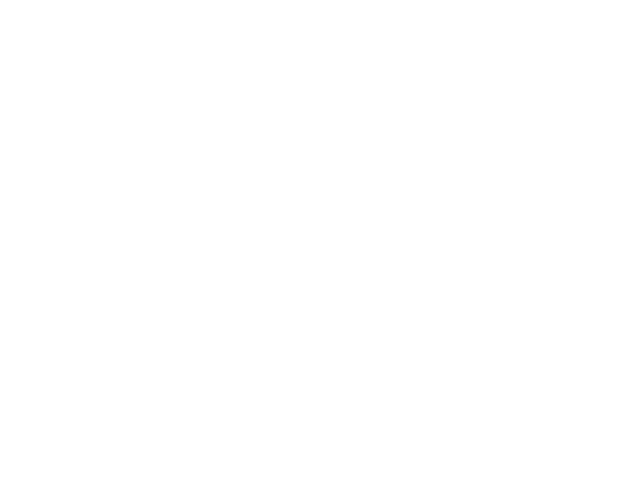

V1_JC076_20190420_FOV1_zoom2p0x_AvsB-test-clfs
... [JC076|20190501|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 285.69
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 156 of 189 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


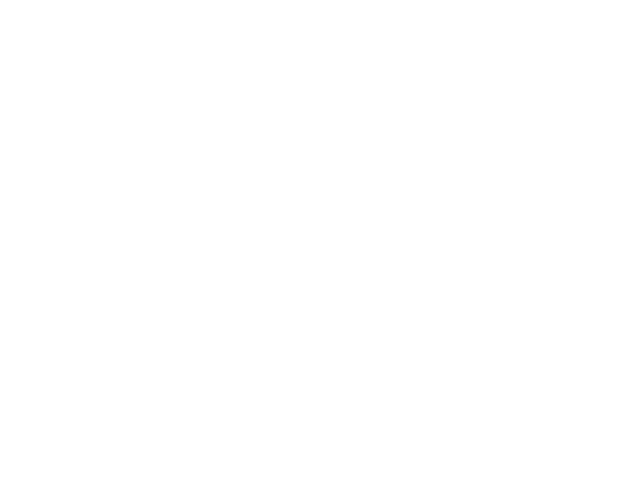

V1_JC076_20190501_FOV1_zoom2p0x_AvsB-test-clfs
... [JC083|20190507|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 297.28
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 119 of 132 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


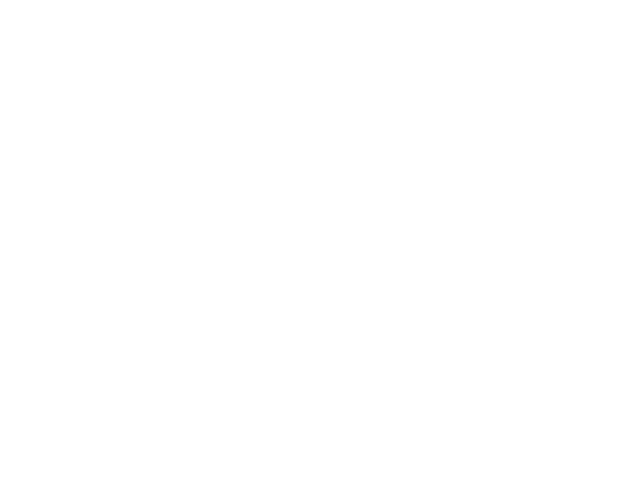

V1_JC083_20190507_FOV1_zoom2p0x_AvsB-test-clfs
... [JC083|20190510|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 310.52
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 100 of 121 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


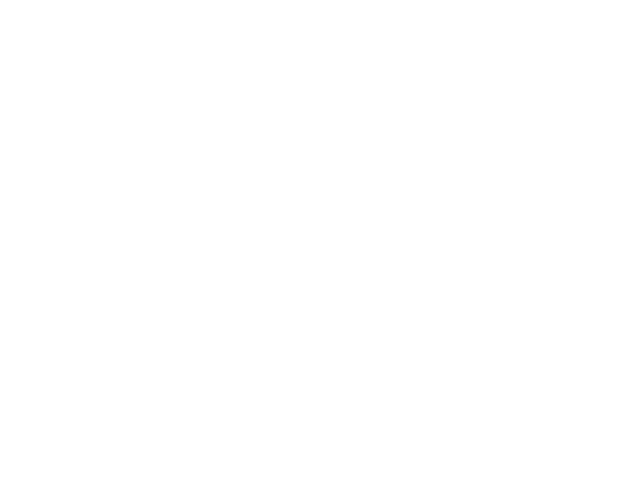

V1_JC083_20190510_FOV1_zoom2p0x_AvsB-test-clfs
... [JC083|20190511|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 327.49
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 120 of 126 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


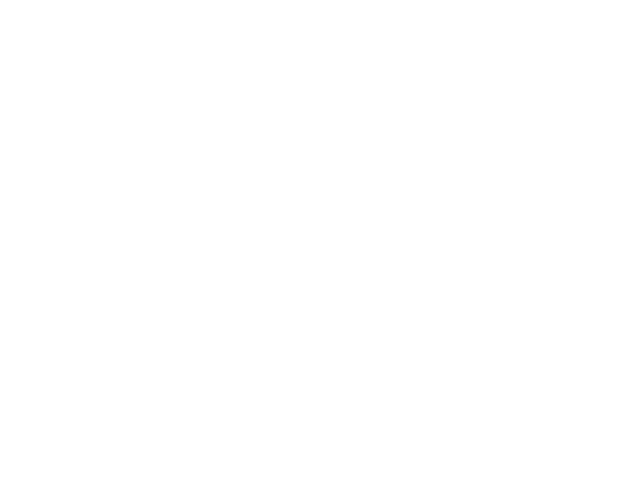

V1_JC083_20190511_FOV1_zoom2p0x_AvsB-test-clfs
... [JC084|20190522|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 608.72
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 128 of 180 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


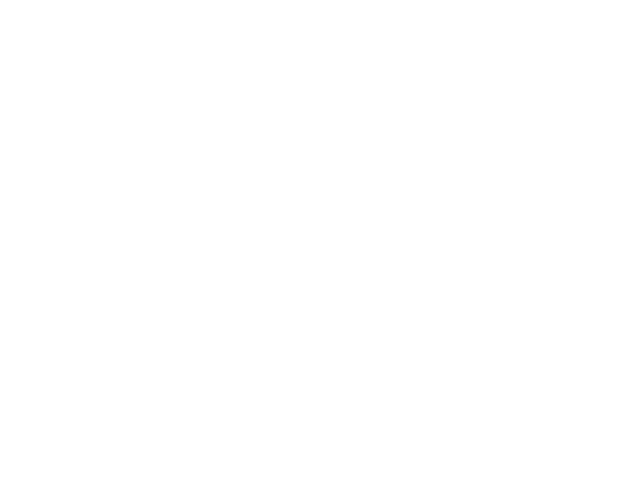

V1_JC084_20190522_FOV1_zoom2p0x_AvsB-test-clfs
... [JC085|20190622|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 370.88
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 185 of 202 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


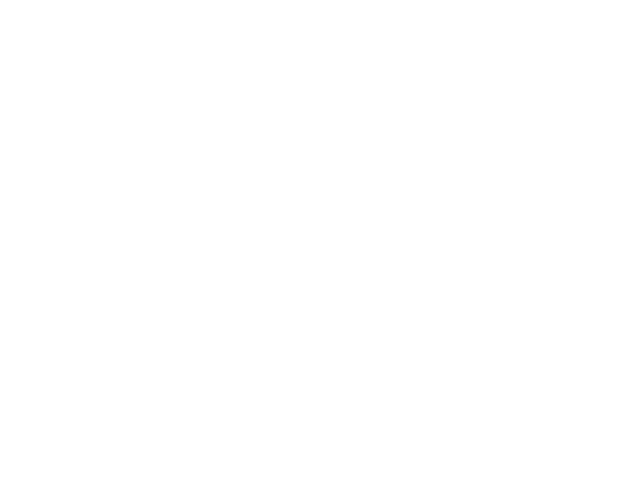

V1_JC085_20190622_FOV1_zoom2p0x_AvsB-test-clfs
... [JC097|20190613|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 634.92
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 125 of 166 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

<IPython.core.display.Javascript object>


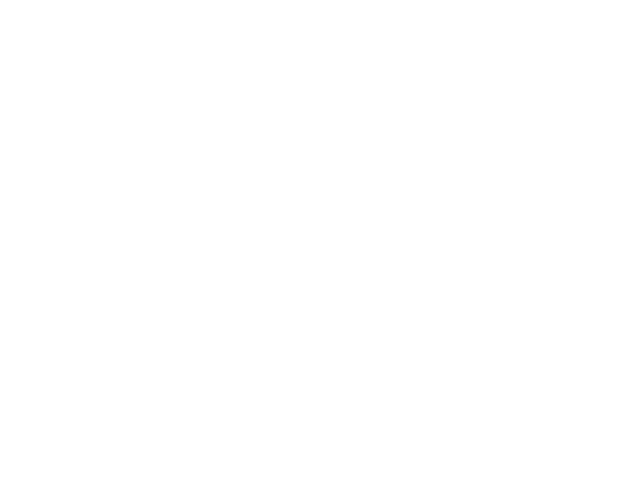

V1_JC097_20190613_FOV1_zoom2p0x_AvsB-test-clfs
... [JC097|20190616|FOV1_zoom2p0x] creating blobs object
... getting data paths - name: blobs
... renaming experiment to run name: combined_blobs_static
Getting stimulus info for: combined_blobs_static
... loading ROI stats: nstds
... [combined_blobs_static] Loading roi stats and cell list...
... loading data array
... offset: 692.01
... updating self
filtering responsive cells: nstds
... getting responsive cells (test: nstds, thr: 10.00')
Plotting 237 of 298 responsive cells.


/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/n/coxfs01/2p-pipeline/envs/pipeline/lib/python2.7/site-packages/sklearn/discriminant

In [ ]:
D = {}
for visual_area in ['V1', 'Lm', 'Li']:
    sessions = dsets[ dsets['visual_area'] == visual_area ]
    n_datasets = sessions.shape[0]
    
    f2, axes = pl.subplots(n_datasets, figsize=(5, n_datasets*5))
    f2.patch.set_alpha(1)

    ai = 0
    SCORES = {}
    for (animalid, session, fov), g in sessions.groupby(['animalid', 'session', 'fov']):
        ax2 = axes[ai]

        data_id = '|'.join([animalid, session, fov, traceid, stats_desc])
        skey = '_'.join([animalid, session, fov])

        exp = util.Objects(animalid, session, fov, traceid=traceid, rootdir=rootdir)
        # Get stimulus conditions
        sdf = exp.get_stimuli()
        sdf = reformat_morph_values(sdf)
        sizes = np.array(sorted(sdf['size'].unique()))
        morphs = np.array(sorted(sdf['morphlevel'].unique()))

        n_sizes = len(sdf['size'].unique())
        n_morphs = len(sdf['morphlevel'].unique()) 
        if n_sizes != n_sz or n_morphs != n_mp:
            incorrect_nvalues.append(skey)
            pass

        rstats, rlist, _ = util.get_roi_stats(animalid, session, fov, exp_name=exp.name,
                                     response_type=response_type, responsive_test=responsive_test,
                                     responsive_thr=responsive_thr, n_stds=n_stds)
        rstats = rstats['nframes_above']

        # Get metrics for each condition
        estats = exp.get_stats(responsive_test=responsive_test, responsive_thr=responsive_thr, n_stds=n_stds)
        meanr = pd.concat([pd.Series(estats.gdf.get_group(roi).groupby(['config']).mean()['dff'], name=roi) \
                           for roi in estats.rois], axis=1).T

        # Get ROI list
        if threshold_dff:
            rois_plot = meanr[(meanr.max(axis=1) > min_dff)].index.tolist()
        else:
            rois_plot = meanr.index.tolist()
        print("Plotting %i of %i responsive cells." % (len(rois_plot), len(meanr.index.tolist())))

        stimdf = sdf[sdf['morphlevel'] != -1]

        sample_data = pd.concat([pd.DataFrame(roidf[response_type].values, columns=[roi],
                                              index=roidf['config']) for roi, roidf in estats.gdf], axis=1)
        sample_data = sample_data[rois_plot]
        sample_labels = np.array(sample_data.index.tolist())


        tested_sizes = sorted(sdf['size'].unique())
        tested_morphs = sorted(sdf['morphlevel'].unique())

        datasets = []
        size_colors = sns.cubehelix_palette(len(tested_sizes))

        for curr_sz, curr_color in zip(sorted(tested_sizes), size_colors):
            if restrict_transform:
                constant_transform_val = curr_sz
                train_configs = stimdf[((stimdf[class_name].isin(class_types)) & (stimdf[constant_transform]==constant_transform_val))].index.tolist()
            else:
                train_configs = stimdf[stimdf[class_name].isin(class_types)].index.tolist()

            # Set train/test set:
            train_ixs = [i for i, l in enumerate(sample_labels) if l in train_configs]

            X = sample_data.iloc[train_ixs].values #[train_configs]
            y = np.array([stimdf[class_name][c] for c in sample_labels[train_ixs]])

            datasets.append((X, y))


        #h = .02  # step size in the mesh

        #figure = plt.figure(figsize=(15, 5))
        #i = 1
        # iterate over datasets
        dataset_scores = {}
        for ds_cnt, ds in enumerate(datasets):
            X, y = ds
            # Set validation set:
            # untrained_class_types = [c for c in stimdf[class_name].unique() if c not in class_types]
            # test_configs = stimdf[( (stimdf[constant_transform]==constant_transform_val) & (stimdf[class_name].isin(untrained_class_types)) )].index.tolist()
            # test_ixs = [i for i, l in enumerate(sample_labels) if l in test_configs]
            # X_test = sample_data.iloc[test_ixs].values
            # y_test_labels = sample_labels[test_ixs]


            X = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=.4, random_state=42)

            # iterate over classifiers
            scores = {}
            for name, clf in zip(names, classifiers):
                #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
                clf.fit(X_train, y_train)
                score = clf.score(X_test, y_test)
                scores[name] = score

            dataset_scores[ds_cnt] = scores


        all_scores = np.empty((len(datasets), len(names)))
        for d, dscores in dataset_scores.items():
            for ni, cname in enumerate(names):
                all_scores[d, ni] = dscores[cname]


        fig, ax = pl.subplots()
        fig.patch.set_alpha(1)
        for cax in [ax, ax2]:
            cbar = cax == ax
            sns.heatmap(all_scores, ax=cax, vmin=0, vmax=1, cmap='RdBu', square=True, cbar=cbar)
            xticks_c = np.linspace(0.5, len(names)-0.5, len(names))
            cax.set_xticks(xticks_c)
            cax.set_xticklabels(names, rotation=90, fontsize=8)
            cax.set_yticklabels(tested_sizes, rotation=0, fontsize=8)
        label_figure(fig, data_id)

        figname = '%s_%s_AvsB-test-clfs' % (visual_area, skey)
        pl.figure(fig.number)
        pl.savefig(os.path.join(outdir, 'sessions', '%s.png' % figname))
        pl.close()
        print figname
        ai += 1
        
        SCORES[skey] = all_scores


    pl.figure(f2.number)
    figname = '%s_AvsB-test-clfs_all-datasets' % (visual_area)
    pl.savefig(os.path.join(outdir, '%s.png' % figname))
    pl.close()

    D[visual_area] = SCORES
    
D['names'] = names
D['classifiers'] = classifiers

with open(os.path.join(outdir, 'all_scores.pkl'), 'wb') as f:
    pkl.dump(f)